In [13]:
import pandas as pd

df = pd.read_csv('archive/news.csv')

df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [16]:
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['target'] = df['label'].map({'REAL': 1, 'FAKE': 0})
df['text'] = df['title'] + ' ' + df['text']
del df['title']
del df['label']
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,6335.0,0.500552,0.500039,0.0,0.0,1.0,1.0,1.0


In [17]:
from wordcloud import WordCloud
%matplotlib inline
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

stop_words = stopwords.words('english')

most_words = '' 
stopwords = set(stop_words) 
  
for value in df['text']: 
    value = str(value) 
    tokens = value.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    most_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 745, height = 745, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 9).generate(most_words) 

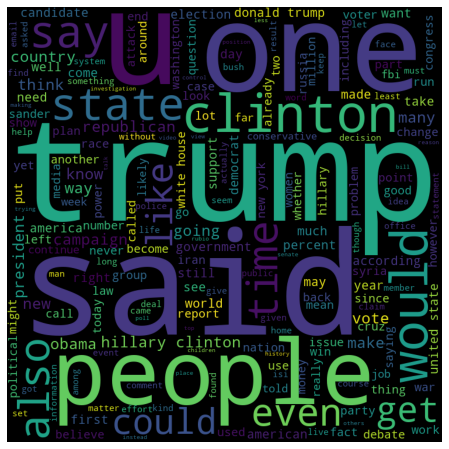

In [18]:
plt.figure(figsize = (8,8), facecolor = None) 
plt.axis("off") 
plt.imshow(wordcloud) 
plt.show()

3171 3164


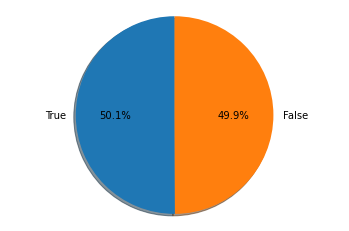

In [20]:
totalLen = len(df['target'])
totalTrueVal = len(df[df['target'] == 1])
totalFalseVal = len(df[df['target'] == 0])
print(totalTrueVal, totalFalseVal)
labels = 'True', 'False'
sizes = [totalTrueVal * 100/totalLen, totalFalseVal* 100/totalLen]

import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()